In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'tesseract'
import LPR

In [2]:
def plot_image(img, grayscale=True):
    plt.axis('off')
    if grayscale:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [3]:
idx = 7
lpr = LPR.LPR()

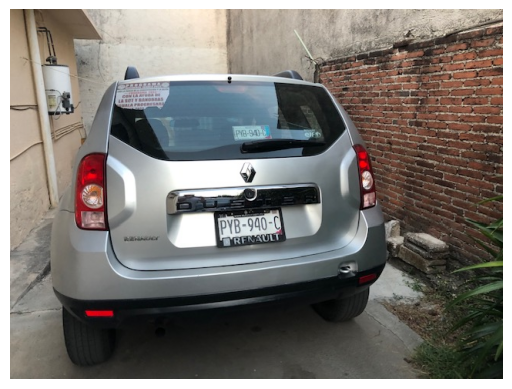

In [4]:
img = cv2.imread(f"./imgs/030.jpg")
plot_image(img, False)

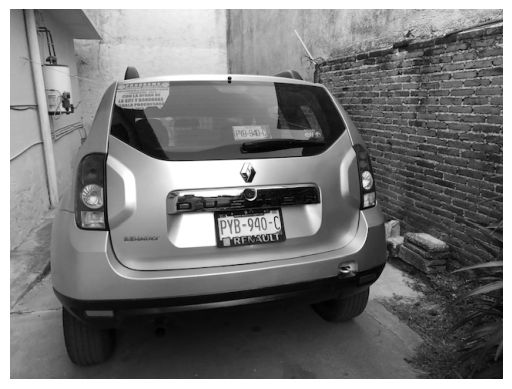

In [5]:
gray = lpr.grayscale(img)
plot_image(gray)

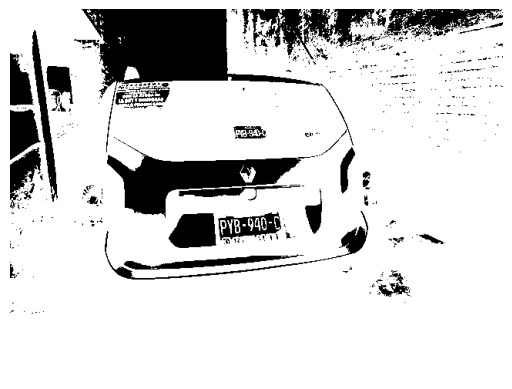

In [6]:
thresh = lpr.apply_threshold(gray)
plot_image(thresh)

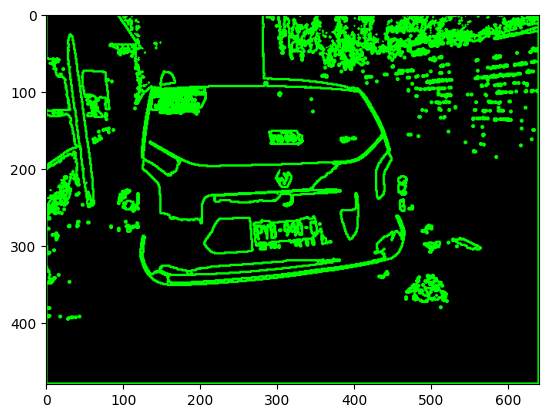

In [7]:
contours = lpr.find_contours(thresh)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , contours, -1, (0, 255, 0), 2)
#plt.axis('off')
plt.imshow(canvas);

27 394 3 3
1.0
3.0769230769
28 393 3 3
1.0
3.0769230769
37 392 3 3
1.0
3.0769230769
32 392 4 3
1.3333333333333333
3.0769230769
42 391 3 3
1.0
3.0769230769
17 391 3 3
1.0
3.0769230769
0 391 3 3
1.0
3.0769230769
1 390 5 4
1.25
3.0769230769
2 380 4 3
1.3333333333333333
3.0769230769
511 379 3 3
1.0
3.0769230769
519 371 3 3
1.0
3.0769230769
515 370 5 3
1.6666666666666667
3.0769230769
492 371 2 1
2.0
3.0769230769
514 369 3 3
1.0
3.0769230769
500 369 3 3
1.0
3.0769230769
478 369 3 3
1.0
3.0769230769
515 368 3 3
1.0
3.0769230769
480 368 3 3
1.0
3.0769230769
476 368 4 3
1.3333333333333333
3.0769230769
515 366 3 3
1.0
3.0769230769
478 366 4 4
1.0
3.0769230769
466 366 3 5
0.6
3.0769230769
476 365 3 3
1.0
3.0769230769
517 364 3 5
0.6
3.0769230769
515 364 3 3
1.0
3.0769230769
506 364 2 2
1.0
3.0769230769
518 362 3 3
1.0
3.0769230769
513 363 1 1
1.0
3.0769230769
515 360 4 4
1.0
3.0769230769
512 361 1 1
1.0
3.0769230769
467 359 3 3
1.0
3.0769230769
483 359 1 1
1.0
3.0769230769
472 358 3 3
1.0
3.07692

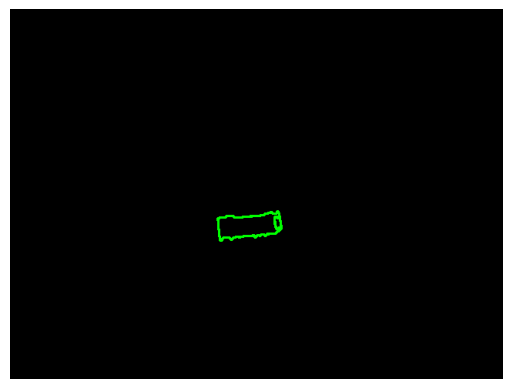

In [8]:
candidates = lpr.filter_candidates(contours)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , candidates, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas);

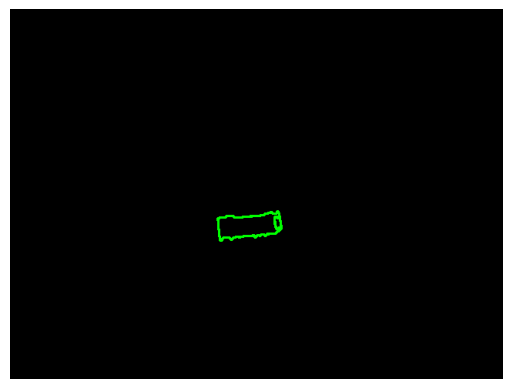

In [9]:
license = lpr.get_lowest_candidate(candidates)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , [license], -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas);

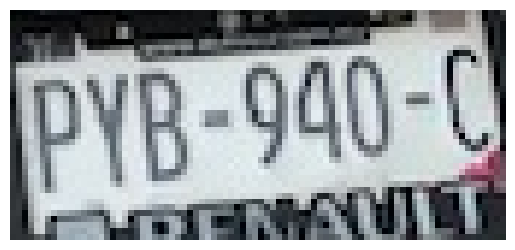

In [10]:
cropped = lpr.crop_license_plate(gray, license)
cropped2 = lpr.crop_license_plate(img, license)
plot_image(cropped2, False)

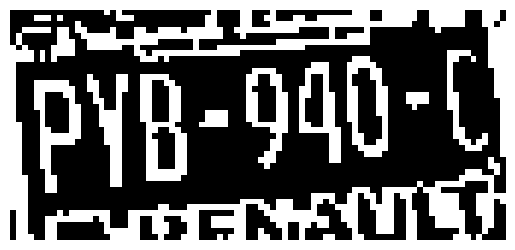

In [11]:
thresh_cropped = lpr.apply_adaptive_threshold(cropped)
plot_image(thresh_cropped)

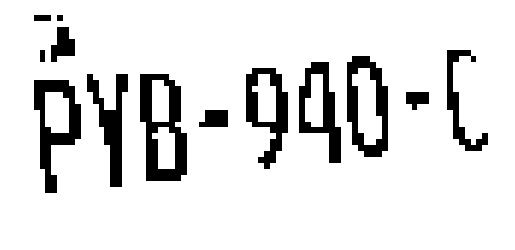

In [12]:
clear_border = lpr.clear_border(thresh_cropped)
final = lpr.invert_image(clear_border)
plot_image(final)

In [13]:
psm = 7
alphanumeric = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
options = "-c tessedit_char_whitelist={}".format(alphanumeric)
options += " --psm {}".format(psm)  
txt = pytesseract.image_to_string(final, config=options)
print(txt[:2], txt[2:5], txt[5:])
print(txt)


PY 940 C

PY940C



In [14]:
data=txt[:2]+txt[2:5]+ txt[5:6]
data

'PY940C'